# Tensor Manipulation 1

## 1D Array with Numpy

In [2]:
import numpy as np

In [3]:
t = np.array([0., 1., 2., 3., 4., 5., 6., 7])
print(t)

[0. 1. 2. 3. 4. 5. 6. 7.]


In [4]:
print('Rank of t:', t.ndim)
print('Shape of t:', t.shape)

Rank of t: 1
Shape of t: (8,)


In [5]:
print('t[0]\tt[1]\tt[-1] =\t', t[0], t[1], t[-1])    # Element
print('t[2:5]\tt[4:-1]\t=\t', t[2:5], t[4:-1])    # Slicing
print('t[:2]\tt[3:] =\t', t[:2], t[3:])    # Slicing

t[0]	t[1]	t[-1] =	 0.0 1.0 7.0
t[2:5]	t[4:-1]	=	 [2. 3. 4.] [4. 5. 6.]
t[:2]	t[3:] =	 [0. 1.] [3. 4. 5. 6. 7.]


## 2D Array with Numpy

In [6]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [7]:
print('Rank of t:', t.ndim)
print('Shape of t:', t.shape)

Rank of t: 2
Shape of t: (4, 3)


## 1D Array with PyTorch

In [8]:
import torch

In [9]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6., 7.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6., 7.])


In [11]:
print(t.dim())  # Rank
print(t.shape)  # Shape
print(t.size())  # Shape
print(t[0], t[1], t[-1])  # Element
print(t[2:5], t[4:-1])  # Slicing
print(t[:2], t[3:])  # Slicing

1
torch.Size([8])
torch.Size([8])
tensor(0.) tensor(1.) tensor(7.)
tensor([2., 3., 4.]) tensor([4., 5., 6.])
tensor([0., 1.]) tensor([3., 4., 5., 6., 7.])


## 2D Array with PyTorch

In [12]:
t = torch.FloatTensor([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [13]:
print(t.dim())  # Rank
print(t.size())  # shape
print(t[:, 1])    # (All dims, 1)
print(t[:, 1].size())    # (All dims, 1)
print(t[:, :-1])    # (All dims, ~except last) = (4, ~2)

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


## Broadcasting

In [14]:
# Same shape
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)    # ([[3+2, 3+2]])

tensor([[5., 5.]])


In [15]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3])  # 3 → [[3, 3]]
print(m1 + m2)

tensor([[4., 5.]])


In [17]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)    # ([[1 + 3, 1 + 4], [2 + 3, 2 + 4]])

tensor([[4., 5.],
        [5., 6.]])


## Multiplication vs Matrix Multiplication

In [18]:
print()
print('-' * 15)
print('Mul vs Matmul')
print('-' * 15)

m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1:', m1.shape)    # 2 x 2
print('Shape of Matrix 2:', m1.shape)    # 2 x 1
print(m1.matmul(m2))  # 2 x 1

m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1:', m1.shape)    # 2 x 2
print('Shape of Matrix 2:', m1.shape)    # 2 x 1
print(m1 * m2)
print(m1.mul(m2))  # 2 x 1


---------------
Mul vs Matmul
---------------
Shape of Matrix 1: torch.Size([2, 2])
Shape of Matrix 2: torch.Size([2, 2])
tensor([[ 5.],
        [11.]])
Shape of Matrix 1: torch.Size([2, 2])
Shape of Matrix 2: torch.Size([2, 2])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


## Mean

In [19]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [20]:
# Can't use mean on integers
t = torch.LongTensor([1, 2])
try:
    print(t.mean())
except Exception as exc:
    print(exc)

Can only calculate the mean of floating types. Got Long instead.


`t.mean`은 특정 dimension이나 모든 element에 대한 평균을 구할때도 쓰인다.

In [22]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [23]:
print(t.mean())
print(t.mean(dim=0))
print(t.mean(dim=1))
print(t.mean(dim=-1))

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


## Sum

In [24]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [25]:
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


## Max and Argmax

In [26]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


`max`연산자는 argument가 지정되지 않을시 하나의 값만을 리턴한다.

In [27]:
print(t.max())

tensor(4.)


`max`연산자는 dimension이 지정될 시, 두개의 값을 리턴한다. 첫번째 값은 최대 value이며, 두번째는 argmax이다. (최대값의 index)

In [28]:
print(t.max(dim=0))  # Returns two values: max and argmax
print('Max:\t', t.max(dim=0)[0])    # Maximum values
print('Argmax:\t', t.max(dim=0)[1])    # Index of maximum values along dim=0

(tensor([3., 4.]), tensor([1, 1]))
Max:	 tensor([3., 4.])
Argmax:	 tensor([1, 1])


# Tensor Manipulation 2

## View (Reshape)

In [29]:
t = np.array([[[0, 1, 2], [3, 4, 5]],
              [[6, 7, 8], [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [30]:
print(ft.view([-1, 3]))
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [31]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


## Squeeze

In [32]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [33]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


## Unsqueeze

In [34]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [35]:
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [36]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [37]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [38]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


## Type Casting

In [39]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [40]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [42]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [43]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


## Concatenate

In [44]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [45]:
print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


## Stacking

In [46]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [48]:
print(torch.stack([x, y, z]))
print(torch.stack([x, y, z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [49]:
# Following code is same code as `torch.stack([x, y, z])`
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


## Ones and Zeros

In [50]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [51]:
print(torch.ones_like(x))  # make a matrix, filled with 1. (with x's shape)
print(torch.zeros_like(x))  # make a matrix, filled with 0. (with x's shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## In-place Operation

In [52]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [53]:
print(x.mul(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [54]:
print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


# Linear Regression

## Main Hypothesis:
$$ y = Wx + b$$
(W: weight, b: bias)

In [55]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [56]:
# Weight와 bias를 0으로 초기화
W = torch.zeros(1, requires_grad=True)  # requires_grad: 학습 가능하도록 지정
b = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b

## Compute loss
Mean Squared Error (MSE):
$$ cost(W,b) = \frac{1}{m}\Sigma^{m}_{i=1}(H(x^{(i)}) - y^{(i)})^2 $$

In [57]:
cost = torch.mean((hypothesis - y_train) ** 2)

## Gradient Descent

- torch.optim 라이브러리 사용
    - [W, b]는 학습할 tensor들
    - lr=0.01은 learning rate

In [59]:
from torch import optim

In [60]:
optimizer = optim.SGD([W, b], lr=0.01)

In [61]:
optimizer.zero_grad()  # 혹시 있을지도 모르는 gradient를 0으로 초기화
cost.backward()  # backward로 gradient 계산
optimizer.step()  # step()으로 개선

## Full Code

In [62]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# Weight와 bias를 0으로 초기화
W = torch.zeros(1, requires_grad=True)  # requires_grad: 학습 가능하도록 지정
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(1, nb_epochs + 1):
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()  # 혹시 있을지도 모르는 gradient를 0으로 초기화
    cost.backward()  # backward로 gradient 계산
    optimizer.step()  # step()으로 개선

# Deeper Look at GD

## Hypothesis (Linear Regression)
$$ H(x) = Wx + b $$

In [64]:
W = torch.zeros(1, requires_grad=True)
# b = torch.zeros(1, requires_grad=True)
# hypothesis = x_train * W + b
hypothesis = x_train * W

## Dummy Data

In [65]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

## Cost Function: MSE

Mean Squared Error (MSE)
$$ cost(W) = \frac{1}{m}\Sigma_{i=1}^{m}(H(x^{(i)}) - y^{(i)})^2 $$

In [66]:
cost = torch.mean((hypothesis - y_train) ** 2)

## Gradient Descent: The Math

$$ cost(W) = \frac{1}{m}\Sigma_{i=1}^{m}(Wx^{(i)} - y^{(i)})^2 $$
$$ \nabla W = \frac{\delta cost}{\delta W} = \frac{2}{m}\Sigma^{m}_{i=1}(Wx^{(i)} - y^{(i)})x^{(i)} $$
$$ W: W - \alpha \nabla W $$
alpha: learning rate, W: gradient

## Gradient Descent: Code

In [68]:
gradient = 2 * torch.mean((hypothesis - y_train) * x_train)
lr = 0.1
W -= lr * gradient

RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.

## Full Code

In [69]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화
W = torch.zeros(1)

# learning rate 설정
lr = 0.1
nb_epochs = 10

for epoch in range(nb_epochs + 1):
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)
    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
    epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost gradient로 H(x) 개선
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


In [70]:
print('W:', W)
print('hypothesis:', hypothesis)

W: tensor([1.0000])
hypothesis: tensor([[0.9999],
        [1.9998],
        [2.9997]])


# Multivariable Linear Regression

## Data

| Quiz 1 (x1) | Quiz 2 (x2) | Quiz 3 (x3) | Final (y) |
|:---:|:---:|:---:|:---:|
| 73  | 80  | 75  | 152  |
| 93  | 88  | 93  | 185  |
| 89  | 91  | 80  | 180  |
| 96  | 98  | 100  | 196  |
| 73  | 66  | 70  | 142  |

In [71]:
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

## Hypothesis Function

$$ H(x) = Wx + b $$
x라는 vector와 W라는 matrix의 곱

$$ H(x) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$
입력변수가 3개라면 weight도 3개!

## Full Code with torch.optim(1)

In [72]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)  # (3,1)모양을 가진다
b = torch.zeros(1, requires_grad=True)

# optimizer설정
optimizer = optim.SGD([W, b], lr=1e-5)

In [73]:
nb_epochs = 20
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b  # or .mm or @
    
    # Cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:6f}'.format(
        epoch,
        nb_epochs,
        hypothesis.squeeze().detach(),  # detach(): 현재의 계산 기록으로 분리시키고 이후에 일어나는 일은 추적하지 않도록 함
        cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712402
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040527
Epoch    4/20 hypothesis: tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936096
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371071
Epoch    6/20 hypothesis: tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]) Cost: 29.758249
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]) Cost: 10.445267
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391237
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493121
Epoch   10/20 hypo

## nn.Module

- nn.Module을 상속해서 모델 생성
- nn.Linear(3, 1)
    - 입력차원: 3
    - 출력차원: 1
- Hypothesis의 계산은 forward()에서!
- Gradient의 계산은 PyTorch가 알아서 해준다. (backward())

In [77]:
import torch.nn as nn

class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
        
    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()
hypothesis = model(x_train)

## F.mse_loss

- torch.nn.functional에서 제공하는 loss function 사용
- 쉽게 다른 loss와 교체 가능! (l1_loss, smooth_l1_loss 등등...)

In [78]:
import torch.nn.functional as F

# Cost 계산
cost = F.mse_loss(hypothesis, y_train)

## Full code with torch.optim (1)

In [79]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
model = MultivariateLinearRegressionModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)  # nn.Module에서 parameter를 불러와 optimizer를 적용하는 방식

In [80]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = model(x_train)
    
    # Cost 계산
    cost = F.mse_loss(hypothesis, y_train)
    
    # Cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print("Epoch {:4d}/{} Hypothesis: {} Cost: {:6f}".format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 Hypothesis: tensor([ -88.7396, -107.5824, -105.5100, -114.8378,  -82.3850]) Cost: 74408.937500
Epoch    1/20 Hypothesis: tensor([17.7877, 20.4566, 20.6484, 22.5456, 15.2767]) Cost: 23325.125000
Epoch    2/20 Hypothesis: tensor([77.4282, 92.1411, 91.2798, 99.4614, 69.9542]) Cost: 7313.063477
Epoch    3/20 Hypothesis: tensor([110.8184, 132.2747, 130.8236, 142.5237, 100.5663]) Cost: 2294.130859
Epoch    4/20 Hypothesis: tensor([129.5121, 154.7443, 152.9627, 166.6326, 117.7051]) Cost: 720.962280
Epoch    5/20 Hypothesis: tensor([139.9778, 167.3244, 165.3575, 180.1303, 127.3008]) Cost: 227.856186
Epoch    6/20 Hypothesis: tensor([145.8369, 174.3676, 172.2968, 187.6870, 132.6733]) Cost: 73.292740
Epoch    7/20 Hypothesis: tensor([149.1169, 178.3111, 176.1817, 191.9177, 135.6814]) Cost: 24.844398
Epoch    8/20 Hypothesis: tensor([150.9530, 180.5191, 178.3567, 194.2863, 137.3658]) Cost: 9.657643
Epoch    9/20 Hypothesis: tensor([151.9807, 181.7554, 179.5743, 195.6123, 138.3090]) 

# Loading Data

## Data in the Real World: Problem

- 엄청난 양의 데이터를 한번에 학습시킬 수 없다!
    - 너무 느리다.
    - 하드웨어적으로 불가능하다. (정해진 메모리 용량)
- 그렇다면 일부분의 데이터로만 학습하면 어떨까?
    - 전체 데이터를 균일하게 나눠서 학습하자!

## PyTorch Dataset

- torch.utils.data.Dataset 상속
- \_\_len\_\_()
    - 이 데이터셋의 총 데이터 수
- \_\_getitem\_\_()
    - 어떠한 인덱스 idx를 받았을 때, 그에 상응하는 입출력 데이터 반환

In [90]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                      [93, 88, 93], 
                      [89, 91, 90],
                      [96, 98, 100],
                      [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        
        return x, y
    
dataset = CustomDataset()

In [91]:
len(dataset)

5

In [93]:
dataset[:2]

(tensor([[73., 80., 75.],
         [93., 88., 93.]]), tensor([[152.],
         [185.]]))

## PyTorch DataLoader

- torch.utils.data.DataLoader 사용
- batch_size=2
    - 각 minibatch의 크기
    - 통상적으로 2의 제곱수로 설정한다. (16, 32, 64, 128, 256, 512, ...)
- shuffle=True
    - Epoch 마다 데이터셋을 섞어서, 데이터가 학습되는 순서를 바꾼다.

In [94]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

## Full Code with Dataset and DataLoader

- enumerate(dataloader)
    - minibatch 인덱스와 데이터를 받음
- len(dataloader)
    - 한 epoch당 minibatch 개수

In [96]:
len(dataloader)  # [0번째, 1번째], [2번째, 3번째], [4번째]

3

In [98]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        
        # H(x) 계산
        prediction = model(x_train)
        
        # Cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # Cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch: {}/{} Cost: {:6f}'.format(
            epoch, nb_epochs, batch_idx + 1, len(dataloader), cost.item()
        ))

Epoch    0/20 Batch: 1/3 Cost: 3.453684
Epoch    0/20 Batch: 2/3 Cost: 3.479603
Epoch    0/20 Batch: 3/3 Cost: 3.629660
Epoch    1/20 Batch: 1/3 Cost: 3.238724
Epoch    1/20 Batch: 2/3 Cost: 3.896069
Epoch    1/20 Batch: 3/3 Cost: 2.529010
Epoch    2/20 Batch: 1/3 Cost: 4.283844
Epoch    2/20 Batch: 2/3 Cost: 2.056861
Epoch    2/20 Batch: 3/3 Cost: 5.744820
Epoch    3/20 Batch: 1/3 Cost: 4.162724
Epoch    3/20 Batch: 2/3 Cost: 2.031227
Epoch    3/20 Batch: 3/3 Cost: 2.665230
Epoch    4/20 Batch: 1/3 Cost: 3.937222
Epoch    4/20 Batch: 2/3 Cost: 1.944501
Epoch    4/20 Batch: 3/3 Cost: 1.819675
Epoch    5/20 Batch: 1/3 Cost: 4.050185
Epoch    5/20 Batch: 2/3 Cost: 2.135216
Epoch    5/20 Batch: 3/3 Cost: 1.980330
Epoch    6/20 Batch: 1/3 Cost: 0.355285
Epoch    6/20 Batch: 2/3 Cost: 4.936532
Epoch    6/20 Batch: 3/3 Cost: 4.091953
Epoch    7/20 Batch: 1/3 Cost: 3.448509
Epoch    7/20 Batch: 2/3 Cost: 1.991413
Epoch    7/20 Batch: 3/3 Cost: 3.143132
Epoch    8/20 Batch: 1/3 Cost: 0.471679


# Logistic Regression

## Reminder

__Hypothesis__:
$$ H(X) = \frac{1}{1 + \exp^{-W^T X}} $$

__Cost__:
$$ cost(W) = -\frac{1}{m} \Sigma {y\log (H(x)) + (1-y)(\log (1 - H(x))} $$
- If y ~ H(x), cost is near 0
- If y != H(x), cost is high.

__Weight Update via Gradient Descent__:
$$ W := W - \alpha \frac{\delta}{\delta W}cost(W) $$
- alpha: Learning rate

## Imports

In [99]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [100]:
# For reproducibility
torch.manual_seed(1)

## Training Data

In [101]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

Consider the following classification problem:
- given the number of hours each student spent watching the lecture and working in the code lab
- predict whether the student passed or failed a course
- For example, the first (index 0) student watched the lecture for 1 hour and spent 2 hours in the lab session ([1, 2])
    - and ended up failing the course([0])

In [102]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [103]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


## Computing the Hypothesis

$$ H(X) = \frac{1}{1 + \exp^{-W^T X}} $$

In [104]:
print('e^1 equals:', torch.exp(torch.FloatTensor([1])))

e^1 equals: tensor([2.7183])


In [105]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [106]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [107]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


Or use `torch.sigmoid()` function.

In [108]:
print('1/(1+e^{-1}) equals:', torch.sigmoid(torch.FloatTensor([1])))

1/(1+e^{-1}) equals: tensor([0.7311])


In [109]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [110]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
torch.Size([6, 1])


## Computing the Cost Function

$$ cost(W) = -\frac{1}{m}\Sigma y\log (H(x)) + (1 - y)(\log (1 - H(x)) $$

In [111]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [112]:
-(y_train[0] * torch.log(hypothesis[0]) + 
 (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

In [113]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [114]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward1>)


In [115]:
# Simpler version
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

## Whole Training Procedure

In [116]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)    # or .mm or @
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}".format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


## Evaluation

In [117]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis[:5])

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01]], grad_fn=<SliceBackward>)


In [118]:
# 기준(0.5)을 넘는다면 True, 아니라면 False
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5])

tensor([[0],
        [0],
        [0],
        [1],
        [1]], dtype=torch.uint8)


In [119]:
# Compare with ground truth (y_train)
print(prediction[:5])
print(y_train[:5])

tensor([[0],
        [0],
        [0],
        [1],
        [1]], dtype=torch.uint8)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [120]:
correct_prediction = prediction.float() == y_train
print(correct_prediction)

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.uint8)


## Higher Implementation with Class

In [127]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [128]:
model = BinaryClassifier()

In [129]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = model(x_train)
    
    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 20 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:6f} Accuracy: {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100
        ))

Epoch    0/100 Cost: 0.733120 Accuracy: 50.00%
Epoch   20/100 Cost: 0.739900 Accuracy: 66.67%
Epoch   40/100 Cost: 0.451816 Accuracy: 83.33%
Epoch   60/100 Cost: 0.288507 Accuracy: 83.33%
Epoch   80/100 Cost: 0.173718 Accuracy: 100.00%
Epoch  100/100 Cost: 0.140431 Accuracy: 100.00%


# Softmax Classification

## Softmax

Convert numbers to probabilities with softmax
$$ P(class = i) = \frac{\exp^i}{\Sigma \exp^i} $$

In [130]:
z = torch.FloatTensor([1, 2, 3])

In [132]:
# PyTorch has `softmax` function
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [133]:
# The probabilities should add up to 1
hypothesis.sum()

tensor(1.)

## Cross Entropy

$$ H(P, Q) = -\mathbb{E}_{x~P(x)}[\log Q(x)] = - \Sigma_{x \in X} P(x) \log Q(x) $$

For multi-class clasification, we use the cross-entropy loss
$$ L = \frac{1}{N} \Sigma{-y \log (\hat{y})} $$

In [134]:
z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2618, 0.1860, 0.1656, 0.2060, 0.1806],
        [0.1655, 0.1989, 0.2616, 0.2549, 0.1191],
        [0.2219, 0.1871, 0.2615, 0.2264, 0.1032]], grad_fn=<SoftmaxBackward>)


In [135]:
y = torch.randint(5, (3,)).long()    # (low_num, shape)
print(y)

tensor([2, 3, 3])


In [136]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)    # scatter(dim, index, source): source값을 index에 맞게 뿌려주는 역할

tensor([[0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]])

In [137]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.5502, grad_fn=<MeanBackward1>)


## Cross-entropy Loss with torch.nn.functional

In [138]:
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3403, -1.6821, -1.7979, -1.5797, -1.7116],
        [-1.7990, -1.6149, -1.3408, -1.3671, -2.1276],
        [-1.5057, -1.6760, -1.3414, -1.4856, -2.2712]], grad_fn=<LogBackward>)

In [139]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.3403, -1.6821, -1.7979, -1.5797, -1.7116],
        [-1.7990, -1.6149, -1.3408, -1.3671, -2.1276],
        [-1.5057, -1.6760, -1.3414, -1.4856, -2.2712]],
       grad_fn=<LogSoftmaxBackward>)

In [140]:
# Low level
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.5502, grad_fn=<MeanBackward1>)

In [141]:
# High level
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.5502, grad_fn=<NllLossBackward>)

In [142]:
F.cross_entropy(z, y)    # combines F.log_softmax & F.nll_loss

tensor(1.5502, grad_fn=<NllLossBackward>)

## Training with Low-level Cross Entropy Loss

In [148]:
x_train = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [149]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # Cost 계산 (1)
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)  # or .mm or @
    y_one_hot = torch.zeros_like(hypothesis)
    y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
    cost = (y_one_hot * -torch.log(F.softmax(hypothesis, dim=1))).sum(dim=1).mean()
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.901535
Epoch  200/1000 Cost: 0.839114
Epoch  300/1000 Cost: 0.807826
Epoch  400/1000 Cost: 0.788472
Epoch  500/1000 Cost: 0.774822
Epoch  600/1000 Cost: 0.764449
Epoch  700/1000 Cost: 0.756191
Epoch  800/1000 Cost: 0.749398
Epoch  900/1000 Cost: 0.743671
Epoch 1000/1000 Cost: 0.738749


## Training with F.cross_entropy

In [150]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # Cost 계산 (2)
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


## High level implementation with nn.Module

In [151]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)    # Input: 4, Output: 3
        
    def forward(self, x):
        return self.linear(x)

In [152]:
model = SoftmaxClassifierModel()

In [155]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # Cost 계산 (3)
    cost = F.cross_entropy(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.709794
Epoch  100/1000 Cost: 0.728848
Epoch  200/1000 Cost: 0.647355
Epoch  300/1000 Cost: 0.590688
Epoch  400/1000 Cost: 0.540985
Epoch  500/1000 Cost: 0.494063
Epoch  600/1000 Cost: 0.448365
Epoch  700/1000 Cost: 0.403141
Epoch  800/1000 Cost: 0.358004
Epoch  900/1000 Cost: 0.312970
Epoch 1000/1000 Cost: 0.269591


# Tips

## Data Preprocessing

데이터를 normal distribution에 맞도록 normalize해주는 작업 등이 포함된다.
$$ x'_j = \frac{x_j - \mu_j}{\sigma_j} $$

sigma: standard deviation, mu: 평균값(mean)

In [158]:
# 데이터 입력
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [159]:
mu = x_train.mean(dim=0)

In [160]:
sigma = x_train.std(dim=0)

In [161]:
norm_x_train = (x_train - mu) / sigma

In [162]:
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


# MNIST Introduction

## Reading data

In [165]:
# Using torchvision.datasets.dsets
import torchvision.datasets as dsets
from torchvision import transforms

In [166]:
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

Processing...
Done!


In [170]:
# Warning: Changed from torch.utils.DataLoader → torch.utils.data.DataLoader (please check document)
dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=1000, shuffle=True, drop_last=True)

In [171]:
len(dataloader)

60

## Softmax (MNIST)

In [172]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [176]:
# MNIST data image of shape 28 * 28 = 784 (flattened)
linear = torch.nn.Linear(784, 10, bias=True).to(device)

# initialization
torch.nn.init.normal_(linear.weight)

# parameters
training_epochs = 15
batch_size = 1000

# define cost/loss & optimizer
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(dataloader)
    
    for X, Y in dataloader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        
        # H(x)
        hypothesis = linear(X)
        
        # Update parameters
        optimizer.zero_grad()
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print("Epoch: {:04d}".format(epoch+1), "cost =", "{:.9f}".format(avg_cost))

Epoch: 0001 cost = 6.185204506
Epoch: 0002 cost = 3.368914366
Epoch: 0003 cost = 2.446892977
Epoch: 0004 cost = 2.002809286
Epoch: 0005 cost = 1.737741828
Epoch: 0006 cost = 1.559336424
Epoch: 0007 cost = 1.430028677
Epoch: 0008 cost = 1.331678271
Epoch: 0009 cost = 1.253919244
Epoch: 0010 cost = 1.190466881
Epoch: 0011 cost = 1.137811184
Epoch: 0012 cost = 1.093274117
Epoch: 0013 cost = 1.054798722
Epoch: 0014 cost = 1.021093488
Epoch: 0015 cost = 0.991394877


## Test

In [177]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    
    print("Accuracy:", accuracy.item())

Accuracy: 0.7996000051498413


In [178]:
correct_prediction

tensor([1, 1, 1,  ..., 1, 0, 1], device='cuda:0', dtype=torch.uint8)

## Visualization

In [179]:
import matplotlib.pyplot as plt
import random

In [180]:
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

In [181]:
print("Label:", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction:", torch.argmax(single_prediction, 1).item())

Label: 3
Prediction: 3


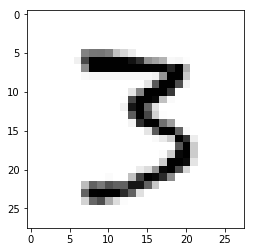

In [182]:
plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap="Greys", interpolation="nearest")
plt.show()